# Problema de Fuerza Centrales

In [24]:
from numpy import *
from matplotlib import pyplot as plt,animation
from scipy.integrate import odeint
%matplotlib nbagg

# Constantes
RAD=180/pi
DEG=pi/180
g=9.8

# Potenciales y Fuerzas

In [49]:
def U(r,params):
    mu=params["mu"]
    Upot=-mu/r
    return Upot

def Ueff(r,params):
    h=params["h"]
    Upot=U(r,params)+h**2/(2*r**2)
    return Upot
    
def F(r,params):
    mu=params["mu"]
    Fza=-mu/r**2
    return Fza
    
def Feff(r,params):
    h=params["h"]
    Fza=F(r,params)+h**2/r**3
    return Fza

# Gráfica de Potenciales

<IPython.core.display.Javascript object>


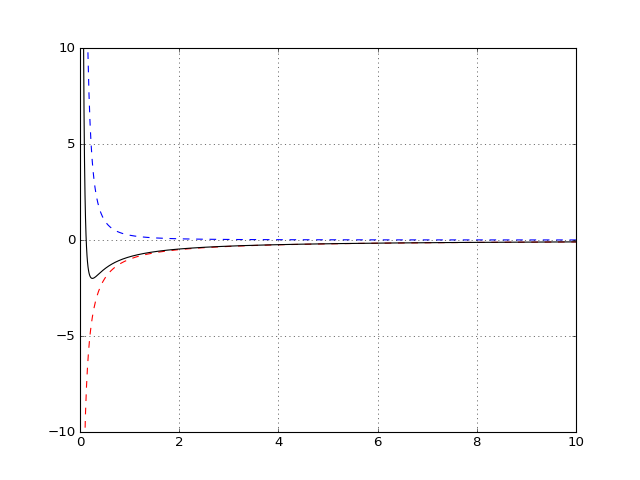

In [50]:
fig=plt.figure()
ax=fig.gca()

rs=linspace(1e-3,10,1000)

params=dict(mu=1,h=0.5)
ax.plot(rs,U(rs,params),'r--')
ax.plot(rs,params["h"]/(2*rs**2),'b--')
ax.plot(rs,Ueff(rs,params),'k-')

Umax=10
ax.set_ylim((-Umax,+Umax))
ax.grid()

# Cálculo de los valores límite de r

In [51]:
E = -1.99
rs = linspace(1e-3,10,10000)
Us = Ueff(rs,params)

condicion=E>Us
rpermitidos=rs[condicion]

if len(rpermitidos)==0:
    print "No hay órbitas con esa energía"
else:
    rmin=rpermitidos[0]
    rmax=rpermitidos[-1]
    print "rmin, rmax = ",rmin,rmax

rmin, rmax =  0.234 0.269


# Verificación usando teoría de los dos cuerpos

In [53]:
a=-params["mu"]/(2.0*E)
e=sqrt(1+2*E*params["h"]**2/params["mu"])

print "Semimajor axis, eccentricity = ",a,e

q=a*(1-e)
Q=a*(1+e)

print "q,Q = ",q,Q

Semimajor axis, eccentricity =  0.251256281407 0.0707106781187
q,Q =  0.233489779367 0.269022783447
